In [1]:
# con_contact
# Authors: Christian Haack, Stephan Meighen-Berger
# Example of how to check the effects of contact tracing

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
# Adding path to module
sys.path.append("../")
# picture path
PICS = '../pics/'

In [4]:
# Module imports
from contagion import Contagion, config

In [5]:
# The fractions of interest

config["general"]["simulation length"] = 200
config["population"]["population size"] = 1000
config["population"]["average social circle"] = 40
config["population"]['re-use population'] = False
config["infection"]["infected"] = 10
config["general"]["random state seed"] = 1337
config["general"]['trace spread'] = True
config["measures"]['type'] = 'contact_tracing'
config["measures"]['tracked fraction'] = 0.5

backtrace_lengths = [0., 7., 14., 21.]

infections = []
infectious = []
quarantined = []
for b_l in backtrace_lengths:
    config["measures"]['backtrack length'] = b_l
        
    # Creating a fourth_day object
    contagion = Contagion()
    # Running the simulations
    contagion.sim()
    # Storing results
    infections.append(np.diff(contagion.statistics['is_incubation']))
    infectious.append(contagion.statistics['is_infectious'])
    quarantined.append(contagion.statistics['is_quarantined'])

In [6]:
# Plotting standards
std_size = 10.
fontsize = 20.
lw=3.
h_length=1.
# from matplotlib import rc
# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True)

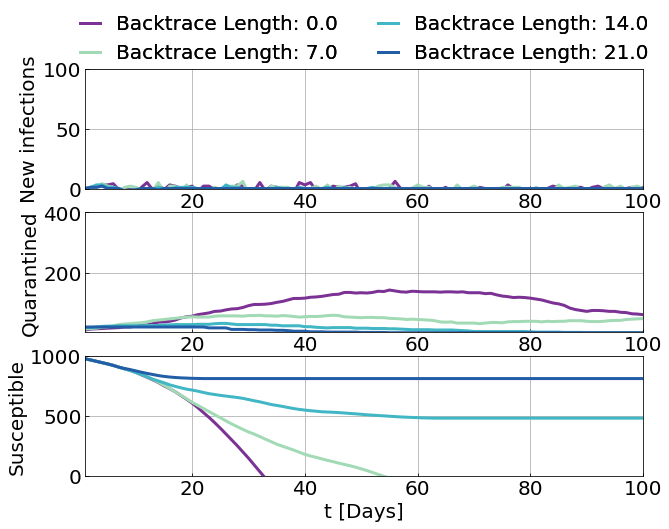

In [7]:
# Infections per time step
figure, (ax1, ax2, ax3) = plt.subplots(3, 1 ,figsize=(std_size, std_size * 6. / 8.))
colors = [
    '#7b3294',
    '#a1dab4',
    '#41b6c4',
    '#225ea8']
high_x = 100
#  New infections
for i, b_l in enumerate(backtrace_lengths):
    ax1.plot(contagion.t[1:], infections[i], color=colors[i],
            lw=lw, label='Backtrace Length: {0}'.format(b_l))
ax1.set_xlim(1e0, high_x)
ax1.set_ylim(0., 100)
ax1.set_xscale('linear')
ax1.set_yscale('linear')
# ax1.set_xlabel(r't [Days]', fontsize=fontsize)
ax1.set_ylabel(r'New infections', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h,l, loc=9, bbox_to_anchor=(0.5, +1.6),
                 ncol=2, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.grid(True)
# Infection total
for i, b_l in enumerate(backtrace_lengths):
    ax2.plot(contagion.t, quarantined[i], color=colors[i],
            lw=lw)
ax2.set_xlim(1e0, high_x)
ax2.set_ylim(1e0, 400)
ax2.grid(True)
ax2.set_xscale('linear')
ax2.set_yscale('linear')
ax2.set_xlabel(r't [Days]', fontsize=fontsize)
ax2.set_ylabel(r'Quarantined', fontsize=fontsize)
ax2.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax2.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
# Healthy
for i, b_l in enumerate(backtrace_lengths):
    ax3.plot(contagion.t,
             config["population"]['population size'] - np.cumsum(infectious[i]),
             lw=lw, color=colors[i],)
ax3.set_xlim(1., high_x)
ax3.set_ylim(0., 1000)
ax3.set_xscale('linear')
ax3.set_yscale('linear')
ax3.set_xlabel(r't [Days]', fontsize=fontsize)
ax3.set_ylabel(r'Susceptible', fontsize=fontsize)
ax3.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax3.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax3.grid(True)
plt.show()

In [ ]:
figure.savefig(PICS + "Contagion_Contact_Tracing.png",
               bbox_inches='tight')